# 作業四範例

### 1.<br>4th Order Runge-Kutta method:<br>先令 $y'=f(t, y)$ 與 $y(t_n)=y_n$ ，以下式得到$y_{n+1}$<br><br>$$k_1=f(t_n, y_n)$$<br>$$k_2=f(t_n+\frac{h}{2}, y_n+\frac{h}{2}k_1)$$<br>$$k_3=f(t_n+\frac{h}{2}, y_n+\frac{h}{2}k_2)$$<br>$$k_4=f(t_n+h, y_n+hk_3)$$<br>$$y_{n+1}=y_n+\frac{h}{6}(k_1+2k_2+2k_3+k_4)$$<br>用此數值方法算小角度單擺，在相同h下與euler method比較。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def euler_method(f, r_init, time_interval, h):
    sim_time = time_interval[1] - time_interval[0]
    iters = int(sim_time / h)
    
    r_list = [np.copy(r_init)]
    t_list = [time_interval[0]]
    
    r_new = np.copy(r_init)
    t = time_interval[0]
    for i in range(iters):
        r_new += f(r_new, t) * h
        t += h
        
        r_list.append(np.copy(r_new))
        t_list.append(t)
    
    return np.array(r_list), np.array(t_list)

In [3]:
def RK4(f, r_init, time_interval, h):
    sim_time = time_interval[1] - time_interval[0]
    iters = int(sim_time / h)
    
    r_list = [np.copy(r_init)]
    t_list = [time_interval[0]]
    
    r_new = np.copy(r_init)
    t = time_interval[0]
    for i in range(iters):
        k1 = h*f(r_new, t)
        k2 = h*f(r_new + k1/2, t + h/2)
        k3 = h*f(r_new + k2/2, t + h/2)
        k4 = h*f(r_new + k3, t + h)
        
        r_new += (k1 + 2*k2 + 2*k3 + k4)/6.
        t += h
    
        r_list.append(np.copy(r_new))
        t_list.append(t)
    
    return np.array(r_list), np.array(t_list)

In [4]:
def f(r, t):
    l = 1
    g = 9.8
    return np.array([r[1], -g/l*np.sin(r[0])])

In [7]:
r_init = np.array([0.5/180*np.pi, 0], dtype=np.float64)
time_interval = [0, 10]
r1_list, t_list = euler_method(f, r_init, time_interval, 0.01)
r2_list, t_list = RK4(f, r_init, time_interval, 0.01)

theta1 = r1_list[:, 0]
theta2 = r2_list[:, 0]

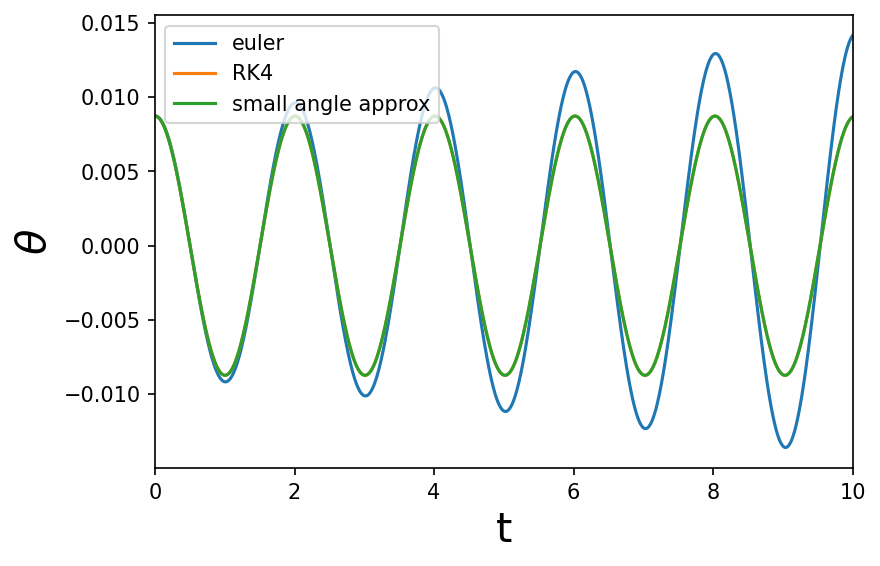

In [11]:
y = np.pi*0.5/180*np.cos(np.sqrt(9.8)*np.array(t_list))

plt.figure(dpi=150)
plt.plot(t_list, theta1, label="euler")
plt.plot(t_list, theta2, label="RK4")
plt.plot(t_list, y, label="small angle approx")
plt.legend()
plt.xlabel('t', fontsize=20)
plt.ylabel(r"${\theta}$", fontsize=20)
plt.xlim(0, 10)
plt.show()

### 2.<br>解阻力正比於速度平方的斜拋，初始位置(x, y) = (0, 10)，初始時間0，初始速度(u, v) = (5, 12)，質量1，阻力係數2。做出圖xy圖, v(t)圖並標出最後的速度。

In [12]:
def f(r, t):
    m = 1
    g = 9.8
    b = 2
    v = np.sqrt(r[2]**2 + r[3]**2)
    return np.array([r[2], r[3], -b*r[2]*v/m, -g - b*r[3]*v/m], dtype=np.float64)

In [13]:
r_init = np.array([0, 10, 5, 12], dtype=np.float64)
time_interval = [0, 3.0]
r_list, t_list = RK4(f, r_init, time_interval, 0.001)

x = r_list[:, 0]
y = r_list[:, 1]
u = r_list[:, 2]
v = r_list[:, 3]

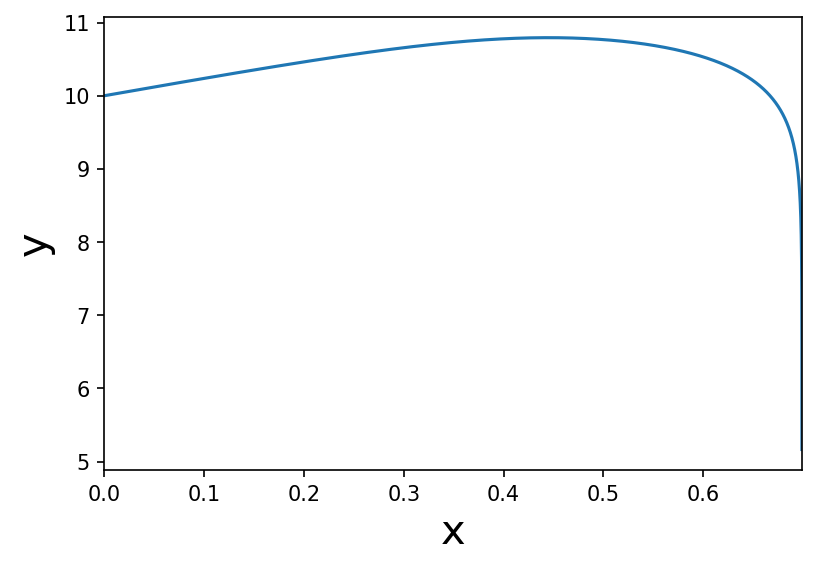

In [14]:
plt.figure(dpi=150)
plt.plot(x, y)
plt.xlabel("x", fontsize=20)
plt.ylabel("y", fontsize=20)
plt.xlim(0, x[-1])
plt.show()

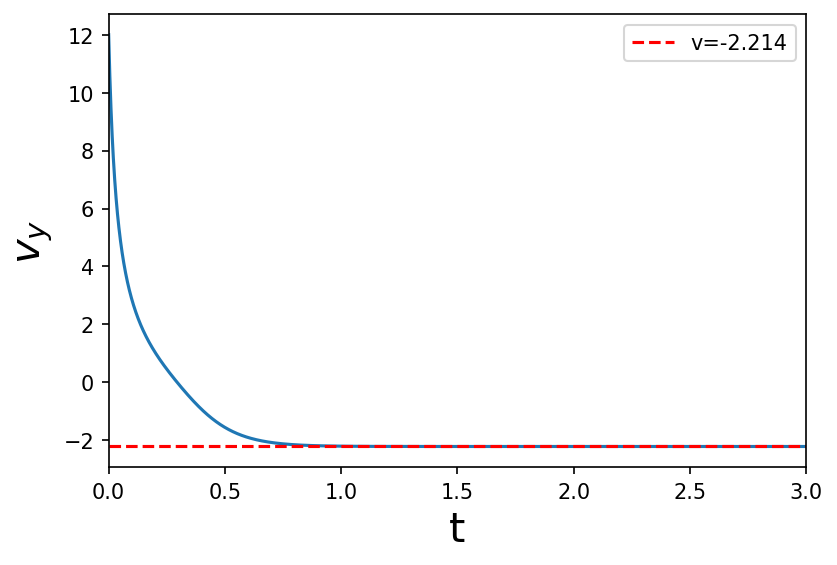

In [15]:
plt.figure(dpi=150)
plt.plot(t_list, v)
plt.plot([i/5 for i in range(int(t_list[-1]*5+0.0001) + 1)], v[-1]*np.ones([int(t_list[-1]*5+0.0001) + 1]), '--r', label="v=%.3f" % v[-1])
plt.legend()
plt.xlabel("t", fontsize=20)
plt.ylabel("$v_y$", fontsize=20)
plt.xlim(0, t_list[-1])
plt.show()

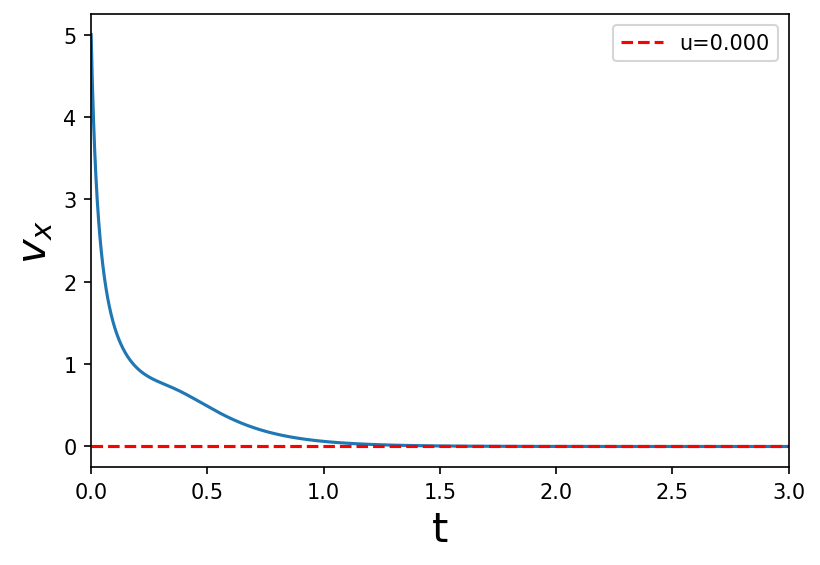

In [16]:
plt.figure(dpi=150)
plt.plot(t_list, u)
plt.plot([i/5 for i in range(int(t_list[-1]*5+0.0001) + 1)], u[-1]*np.ones([int(t_list[-1]*5+0.0001) + 1]), '--r', label="u=%.3f" % u[-1])
plt.legend()
plt.xlabel("t", fontsize=20)
plt.ylabel("$v_x$", fontsize=20)
plt.xlim(0, t_list[-1])
plt.show()

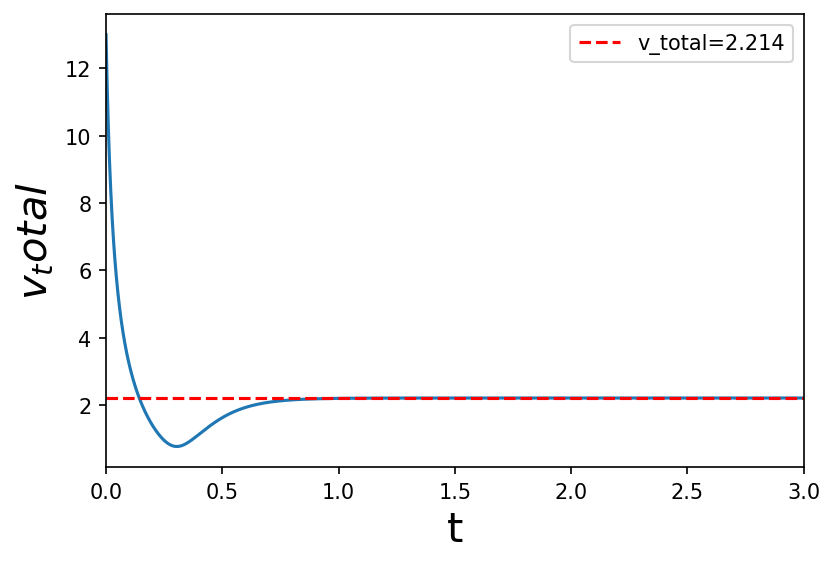

In [17]:
v_total = np.sqrt(u**2. + v**2.)

plt.figure(dpi=150)
plt.plot(t_list, v_total)
plt.plot([i/5 for i in range(int(t_list[-1]*5+0.0001) + 1)], v_total[-1]*np.ones([int(t_list[-1]*5+0.0001) + 1]), '--r', label="v_total=%.3f" % v_total[-1])
plt.legend()
plt.xlabel("t", fontsize=20)
plt.ylabel("$v_total$", fontsize=20)
plt.xlim(0, t_list[-1])
plt.show()

### 3.<br>解同軌道雙星運動，質量皆為1，初始位置(-1, 0)及(1, 0)，初始速度(0,    -0.5)及(0, 0.5)。將兩星體位置x, y作圖。換為不軌道，質量比1:2，初始位置(-2, 0)及(1, 0)，初始速度(0, -2/3)及(0, 1/3)。(重力常數G簡化為1)

In [19]:
global m1, m2
m1 = 1
m2 = 1
def f(r, t):
    distance = np.sqrt((r[0] - r[4])**2 + (r[1] - r[5])**2)
    return np.array([r[2], r[3], 
                    m2*(r[4] - r[0])/distance**3, 
                    m2*(r[5] - r[1])/distance**3,
                     r[6], r[7],
                    m1*(r[0] - r[4])/distance**3, 
                    m1*(r[1] - r[5])/distance**3])

In [20]:
r_init = np.array([-1., 0., 0., -0.5, 1., 0., 0., 0.5], dtype=float)
time_interval = [0, 8]
h = 0.01

r_list, t = RK4(f, r_init, time_interval, h)

x1 = r_list[:, 0]
y1 = r_list[:, 1]

x2 = r_list[:, 4]
y2 = r_list[:, 5]

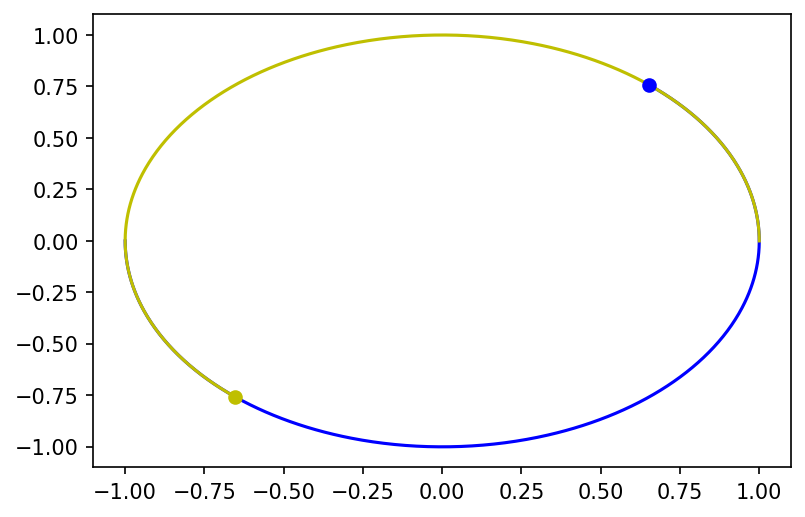

In [21]:
plt.figure(dpi=150)
plt.plot(x1, y1, 'b')
plt.plot(x2, y2, 'y')
plt.plot(x1[-1], y1[-1], 'ob')
plt.plot(x2[-1], y2[-1], 'oy')
plt.show()

In [22]:
m1 = 1
m2 = 2

In [23]:
r_init = np.array([-2., 0., 0., -2/3., 1., 0., 0., 1/3.], dtype=float)
time_interval = [0, 20]
h = 0.01

r_list, t = RK4(f, r_init, time_interval, h)

x1 = r_list[:, 0]
y1 = r_list[:, 1]

x2 = r_list[:, 4]
y2 = r_list[:, 5]

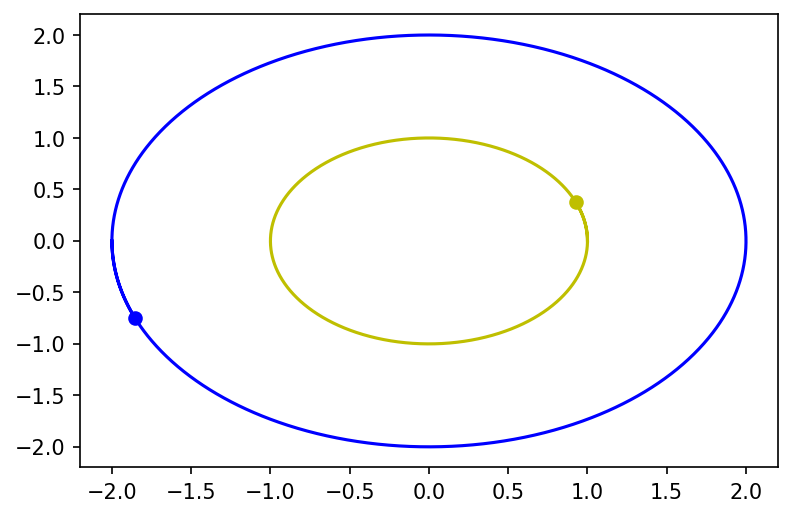

In [24]:
plt.figure(dpi=150)
plt.plot(x1, y1, 'b')
plt.plot(x2, y2, 'y')
plt.plot(x1[-1], y1[-1], 'ob')
plt.plot(x2[-1], y2[-1], 'oy')
plt.show()